In [2]:
import pandas as pd


df = pd.read_csv("data/labeling_in_progress_2023_12_28_13_20.csv")

merge cosrt: [0.64438503 0.81461676 0.60606061]
merge cosrt: [0.6399287  0.9741533  0.59982175]


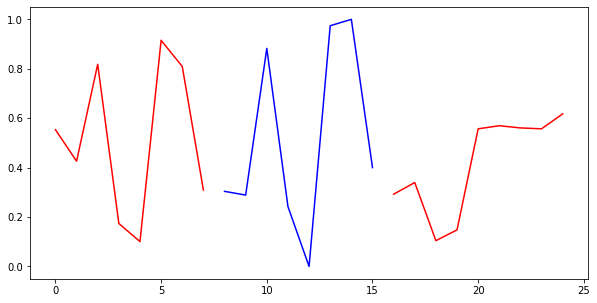

[0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1264273554989976, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.1410540010040639, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135, 0.0755814056118135]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.47153465 0.61881188 0.34034653]
merge cosrt: [0.36943069 0.38180693 0.28465347]
merge cosrt: [0.28465347 0.20915842 0.14913366]


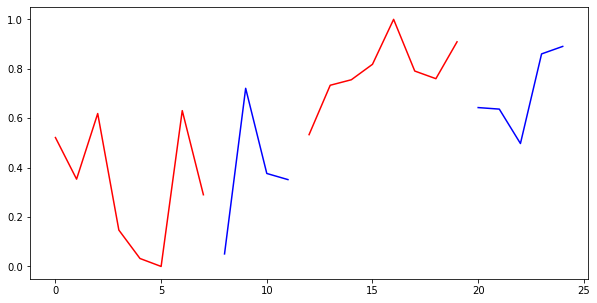

[0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0565753357513969, 0.0568844544958827, 0.0568844544958827, 0.0568844544958827, 0.0568844544958827, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.03103579956928242, 0.056192867120870495, 0.056192867120870495, 0.056192867120870495, 0.056192867120870495, 0.056192867120870495]
Границы сегментов: [0, 8, 12, 20]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.30317041 0.24768824 0.41677675]
merge cosrt: [0.43791281 0.32232497 0.19682959]


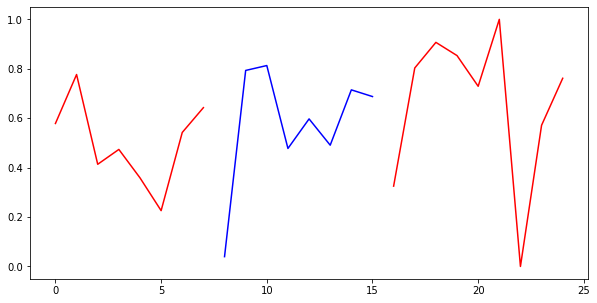

[0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.04595636673303678, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.06731748724803639, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967, 0.09954966038389967]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.18223383 0.38798171 0.38798171]
merge cosrt: [0.18484651 0.20770738 0.35009798]


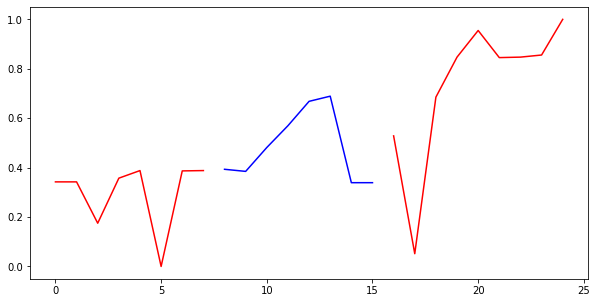

[0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.025124404800250535, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.038675664825481224, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106, 0.14605831752320106]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
merge cosrt: [0.23489933 0.4261745  0.28691275]
merge cosrt: [0.75503356 0.28020134 0.31375839]


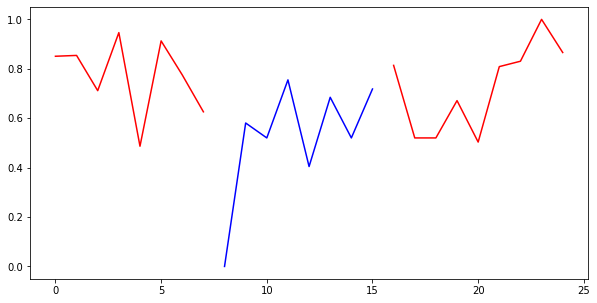

[0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.04208178967163638, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.08924464269627488, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805, 0.04815286098223805]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.42592593 0.55324074 0.1400463 ]
merge cosrt: [0.63310185 0.79050926 0.27199074]


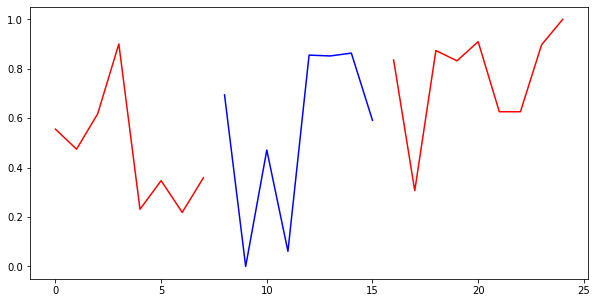

[0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.05608553160365227, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.10841585219478735, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485, 0.09444629010440485]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.36853002 0.58730159 0.7826087 ]
merge cosrt: [0.55831608 0.86887509 0.78191856]
merge cosrt: [0.78191856 0.92408558 0.56245687]


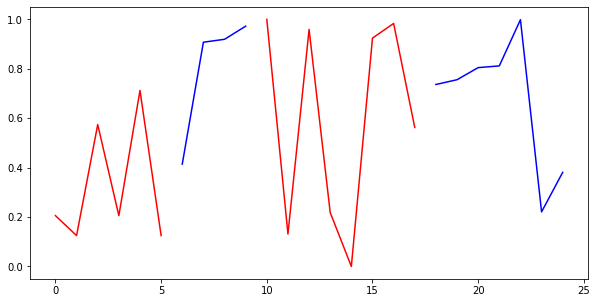

[0.0933018543364509, 0.0933018543364509, 0.0933018543364509, 0.0933018543364509, 0.0933018543364509, 0.0933018543364509, 0.07968728344099665, 0.07968728344099665, 0.07968728344099665, 0.07968728344099665, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.15973915996420274, 0.14841561393263358, 0.14841561393263358, 0.14841561393263358, 0.14841561393263358, 0.14841561393263358, 0.14841561393263358, 0.14841561393263358]
Границы сегментов: [0, 6, 10, 18]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.57225434 0.17846821 0.21098266]
merge cosrt: [0.13439306 0.11849711 0.21315029]


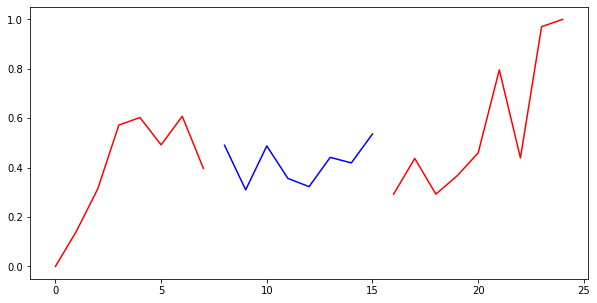

[0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.04438159895085035, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.01950305827959504, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684, 0.2631402420914684]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
merge cosrt: [0.62328443 0.16138192 0.42877425]
merge cosrt: [0.33980123 0.47373403 0.93090393]
merge cosrt: [0.08140085 0.50165641 0.47420729]


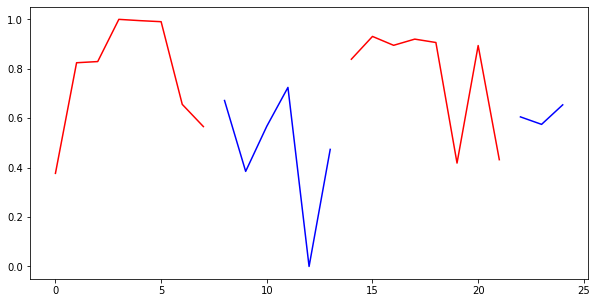

[0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.0915412981052323, 0.05719493363859735, 0.05719493363859735, 0.05719493363859735, 0.05719493363859735, 0.05719493363859735, 0.05719493363859735, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.16310090734817412, 0.0028742061832687494, 0.0028742061832687494, 0.0028742061832687494]
Границы сегментов: [0, 8, 14, 22]
true segments: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.26865672 0.29197761 0.49626866]
merge cosrt: [0.36660448 0.14272388 0.07649254]


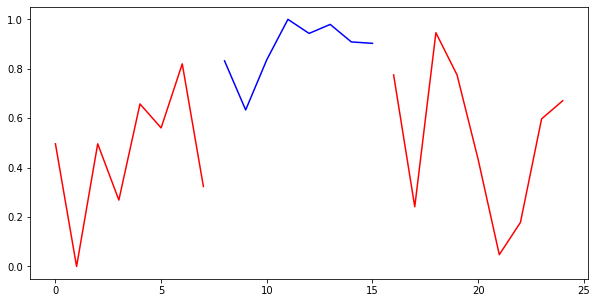

[0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.07266503884495436, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.012374323868066374, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655, 0.10828814184673655]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.06735113 0.14537988 0.15646817]
merge cosrt: [0.0788501  0.60328542 0.25831622]


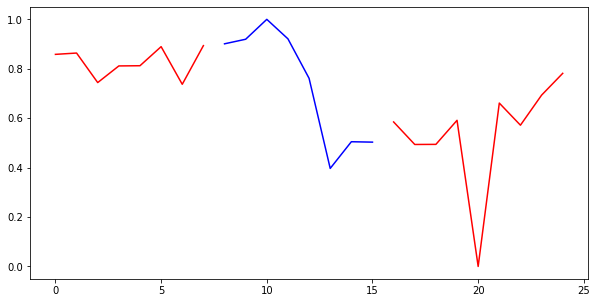

[0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.0077937251495768765, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10394105047455608, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178, 0.10193977946340178]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.7931197  0.33600377 0.67577757]
merge cosrt: [0.46418473 0.33506126 0.33553252]
merge cosrt: [0.18991517 0.35721018 0.50094251]


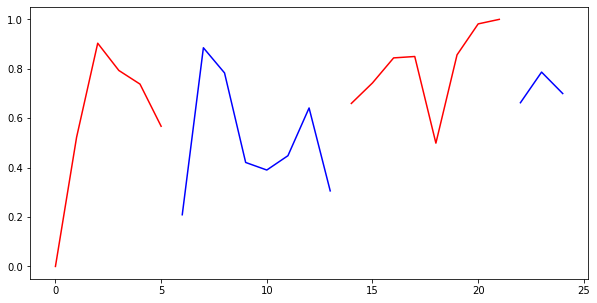

[0.08614830702574915, 0.08614830702574915, 0.08614830702574915, 0.08614830702574915, 0.08614830702574915, 0.08614830702574915, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.09072963016591146, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.06260534914956725, 0.00296824583237468, 0.00296824583237468, 0.00296824583237468]
Границы сегментов: [0, 6, 14, 22]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.24883504 0.24044734 0.15470643]
merge cosrt: [0.66449208 0.56756757 0.10531221]


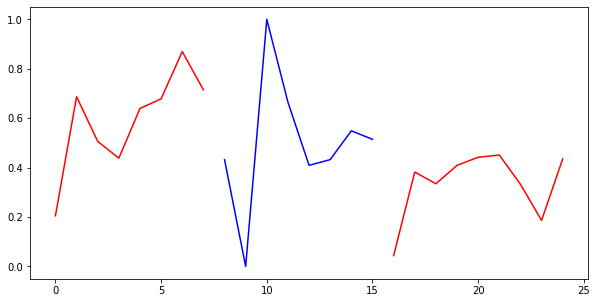

[0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.05147659791423655, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.0685829159171705, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153, 0.026618899646505153]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.18794475 0.01758058 0.86019255]
merge cosrt: [0.65592298 0.23273336 0.20761825]
merge cosrt: [0.23273336 0.20761825 0.26035998]


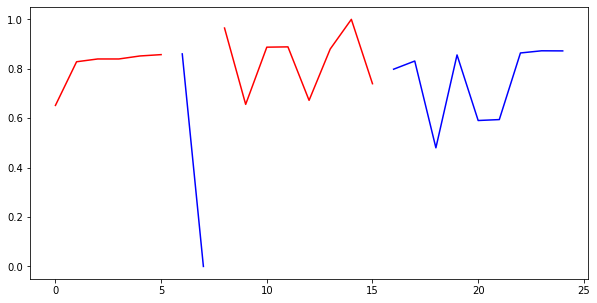

[0.007287102536081865, 0.007287102536081865, 0.007287102536081865, 0.007287102536081865, 0.007287102536081865, 0.007287102536081865, 0.3699656108356266, 0.3699656108356266, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.024219309725175765, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138, 0.03532790019462138]
Границы сегментов: [0, 6, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.76559546 0.44328922 0.5047259 ]
merge cosrt: [0.15689981 0.73818526 0.73818526]


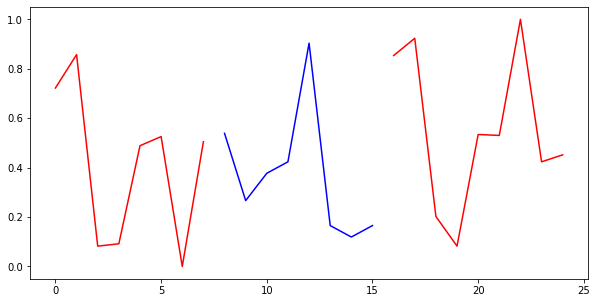

[0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.09701223194599792, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.10101059619569686, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519, 0.0996558958678519]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [1.         0.97198755 0.22365496]
merge cosrt: [0.97198755 0.22365496 0.25833704]
merge cosrt: [0.19964429 0.38683859 0.24899956]


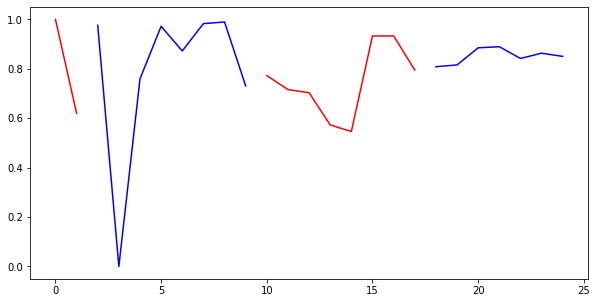

[0.07209528032912607, 0.07209528032912607, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.10039727157032981, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.020584564929900163, 0.0008459016573091661, 0.0008459016573091661, 0.0008459016573091661, 0.0008459016573091661, 0.0008459016573091661, 0.0008459016573091661, 0.0008459016573091661]
Границы сегментов: [0, 2, 10, 18]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.01491175 0.03849665 0.03514912]
merge cosrt: [0.19773281 0.32113512 0.60651248]


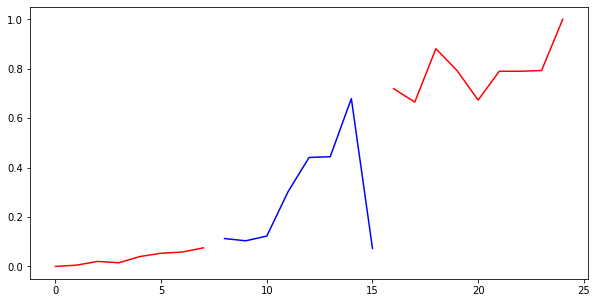

[0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.002405536480546588, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.08732641697782584, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524, 0.0539655602968524]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.23229462 0.04613517 0.72804533]
merge cosrt: [0.60906516 0.60501821 0.14447592]


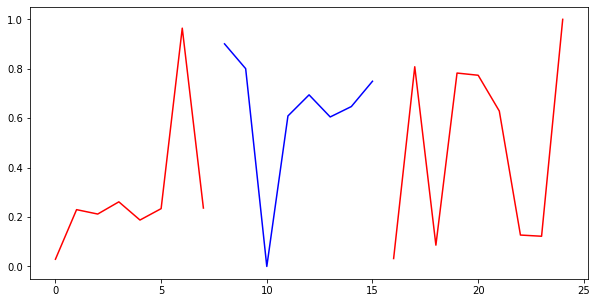

[0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.07207608665210903, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.08016952537742138, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845, 0.39750376365479845]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.99457861 0.54657467 0.35189749]
merge cosrt: [0.30359783 0.24149828 0.23607689]


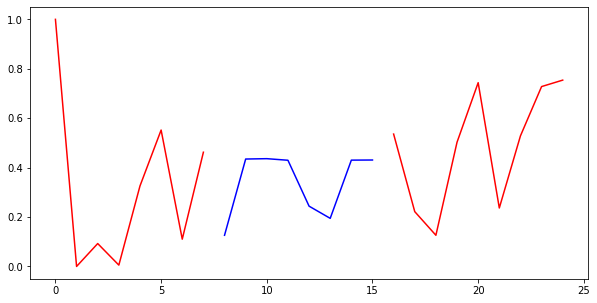

[0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.12484095815213661, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.02293008158439932, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692, 0.12310785003463692]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
merge cosrt: [0.49598987 0.53102575 0.53946813]
merge cosrt: [0.27184466 0.22794428 0.27691009]


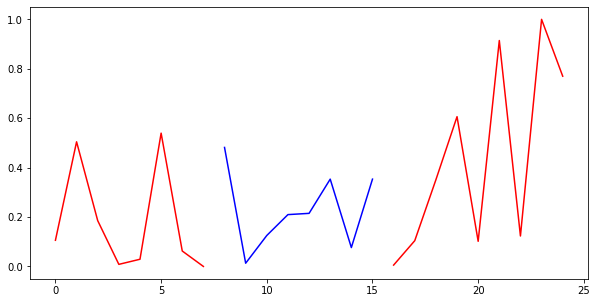

[0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.0744832516387181, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.03757848358234913, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491, 0.2409478868003491]
Границы сегментов: [0, 8, 16]
true segments: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from segmentation_tools_custom import SWAB, bottom_up, sliding_window, top_down


amount_of_plots = 20


for i in range(amount_of_plots):
    norm_prices = np.array([df.at[i, f'norm_price_{j + 1}'] for j in range(25)]).reshape(-1, 1)
    buy_sell_labels = [df.at[i, f'sep_point_{j + 1}'] for j in range(25)]

    plt.figure(figsize=(10, 5))  # Измените значения ширины и высоты по вашему усмотрению

    max_error = 0.75  # Максимально допустимая ошибка сегментации
    buffer_size = 9   # Размер буфера
    segmenter = SWAB()
    # Настройка параметров сегментации linear_interpolation or linear_regression
    plr = "linear_regression"  # Метод аппроксимации: линейная регрессия
    error_type = "mse"  # Тип ошибки: максимальная ошибка

    # Применение алгоритма сегментации к временному ряду
    segmenter.fit(norm_prices, max_error, plr, error_type, buffer_size)

    # Визуализация результата
    segmenter.segment_plot()

    # Расчет и визуализация ошибок
    errors = []
    for segment in segmenter.segments:
        # Вычисление ошибки для каждого сегмента
        segment_error = segmenter.calculate_error(segment.data)
        errors.extend([segment_error] * len(segment.data))

    print(errors)

    # Вывод границ сегментов
    print("Границы сегментов:", segmenter.segment_borders)
    print(f"true segments: {buy_sell_labels}")
